# Обзор данных WRF-HRRR

Thanks to [CropNet](https://github.com/fudong03/CropNet/)
and [Google Drive](https://drive.google.com/drive/folders/1Js98GAxf1LeAUTxP1JMZZIrKvyJStDgz)

***

## Срез данных
Все данные (2017-2022) всех штатов весят больше 1 тб. Поэтому отберем следующие:
- Данные за *2017-2022* годы.
- Данные по следующим культурам: *Кукуруза*.
- Данные для штатов: *Айова, Иллинойс* ("IA", "IL").

***

## Описание
WRF-HRRR Computed Dataset — это набор данных, полученных с помощью численных моделей прогнозирования погоды WRF и HRRR.

**WRF (Weather Research and Forecasting Model)**
Современная система численного прогноза погоды (ЧПП), разработанная для исследований и оперативного прогнозирования.

**HRRR (High-Resolution Rapid Refresh)**
Высокоточная модель краткосрочного прогноза погоды (до 18 часов), работающая в реальном времени.

**WRF-HRRR Computed Dataset** - это набор данных, полученных с помощью численных моделей прогнозирования погоды WRF и HRRR. Содержит ежедневные и ежемесячные метеорологические параметры.
- Метеорологических параметров: 9;
- пространственное разрешение: 9 км;
- временной шаг: день или месяц.

## Файлы данных
- Структура хранения файлов: `data/raw/WRF-HRRR/<year>/<state abbreviation>/<file_name>`;
- формат названия файла: `HRRR_<state FIPS>_<state abbreviation>_<year>-<month>.csv`;
- пример: `data/raw/WRF-HRRR/2019/IA/HRRR_19_IA_2019-01.csv`;

## Формат данных

| Column Name                                 | Description                                                  |
| ------------------------------------------- | ------------------------------------------------------------ |
| Year                                        | The year of the data represented, e.g., 2022                 |
| Month                                       | The month of the data represented, e.g, 01                   |
| Day                                         | The day of the data represented, e.g., 01                    |
| Daily/Monthly                               | The type of weather parameters. i.e., daily or monthly weather parameters |
| State                                       | The state of the data represented, e.g., ALABAMA             |
| County                                      | The county of the data represented, e.g., AUTAUGA             |
| FIPS Code                                   | The FIPS code for the U.S. county, e.g., 01001               |
| Grid Index                                  | The index of grids after partitioning one county into 9x9 km grids |
| Lat (llcrnr)                                | The latitude of the lower left corner of the grid, e.g., 32.34 |
| Lon (llcrnr)                                | The longitude of the lower left corner of the grid, e.g., -86.91 |
| Lat (urcrnr)                                | The latitude of the upper right corner of the grid, e.g., 32.46 |
| Lon (urcrnr)                                | The longitude of the upper right corner of the grid, e.g., -86.18 |
| Avg Temperature (K)                         | 2 metre averaged temperature during a day/month. Unit: K      |
| Max Temperature (K)                         | 2 metre maximal temperature during a day/month. Unit: K       |
| Min Temperature (K)                         | 2 metre minimal temperature during a day/month. Unit: K       |
| Precipitation (kg m**-2)                    | Total precipitation. Unit: kg $m^{-2}$                       |
| Relative Humidity (%)                       | 2 metre relative humidity. Unit: %                           |
| Wind Gust (m s**-1)                         | Wind gust on the ground. Unit: m $s^{-1}$                    |
| Wind Speed  (m s**-1)                       | Wind speed on the ground. Unit: m $s^{-1}$                   |
| U Component of Wind (m s**-1)               | The horizontal speed of the air moving towards the East. A negative value indicates wind blowing westward. Unit: m $s^{-1}$ |
| V Component of Wind (m s**-1)               | The horizontal speed of the air moving towards the North. A negative value indicated wind blowing towards the south. Unit: m $s^{-1}$ |
| Downward Shortwave Radiation Flux (W m**-2) | The total amount of shortwave radiation that reaches the Earth’s surface. Unit: W $m^{-2}$ |
| Vapor Pressure Deficit (kPa)                | The amount of drying power the air has upon the plant. Unit: kPa |

***

In [12]:
import numpy as np
import pandas as pd
from pathlib import Path

In [ ]:
PATH_DATA = Path("../data")
PATH_DATA_HRRR = PATH_DATA / "raw/WRF-HRRR/2019"

In [14]:
data = pd.read_csv(PATH_DATA_HRRR / "IA/HRRR_19_IA_2019-01.csv")
data.head()

,Year,Month,Day,Daily/Monthly,State,County,FIPS Code,Grid Index,Lat (llcrnr),Lon (llcrnr),...,Max Temperature (K),Min Temperature (K),Precipitation (kg m**-2),Relative Humidity (%),Wind Gust (m s**-1),Wind Speed (m s**-1),U Component of Wind (m s**-1),V Component of Wind (m s**-1),Downward Shortwave Radiation Flux (W m**-2),Vapor Pressure Deficit (kPa)
0,2019,1,1.0,Daily,IOWA,ADAIR,19001,0.0,41.157134,-94.700629,...,272.024,260.974,0.128,79.8,8.729,5.869,2.498,-5.279,1681.8,0.062
1,2019,1,2.0,Daily,IOWA,ADAIR,19001,0.0,41.157134,-94.700629,...,273.440,263.678,0.066,71.0,8.588,4.647,3.358,3.068,2623.3,0.128
2,2019,1,3.0,Daily,IOWA,ADAIR,19001,0.0,41.157134,-94.700629,...,282.515,267.061,0.000,63.9,7.490,3.342,2.319,2.319,2629.9,0.256
3,2019,1,4.0,Daily,IOWA,ADAIR,19001,0.0,41.157134,-94.700629,...,283.756,269.771,0.000,69.9,4.783,2.390,1.735,1.014,2596.9,0.252
4,2019,1,5.0,Daily,IOWA,ADAIR,19001,0.0,41.157134,-94.700629,...,286.203,270.517,0.000,78.5,3.740,1.843,1.735,0.522,2617.2,0.231


In [15]:
data.shape

(40461, 23)

***

## Карта покрытия метеорологическими данными США

В признаках `Lat (llcrnr)`, `Lon (llcrnr)`, `Lat (urcrnr)`, `Lon (urcrnr)` есть *NaN* значения. Пока избавимся от них, скорее всего они окажутся не не нужными.

In [16]:
coord_features = [
    "Lat (llcrnr)",
    "Lon (llcrnr)",
    "Lat (urcrnr)",
    "Lon (urcrnr)",
]
data[coord_features].isna().sum()

Lat (llcrnr)    99
Lon (llcrnr)    99
Lat (urcrnr)    99
Lon (urcrnr)    99
dtype: int64

In [17]:
data.dropna(
    subset=coord_features,
    axis=0,
    inplace=True,
)

In [18]:
data.isna().any().sum()

np.int64(0)

Каждый файл охватывает некоторую площадь.

Пройдемся по координатам за один месяц для каждого *округа* и найдем *крайние нижнии левые точки* и *крайние правые верхние точки*.

In [19]:
polygons_list = []
# Проходимся по директориям штатов
for state_dir in PATH_DATA_HRRR.iterdir():
    # Достаточно по одному файлу из директории,
    # т.к. остальные - повторные замеры тех же локаций
    data = pd.read_csv(next(state_dir.iterdir()))
    data.dropna(subset=coord_features, axis=0, inplace=True)
    polygons_list.append(
        data[["FIPS Code"] + coord_features]
        .drop_duplicates()
        .set_index("FIPS Code")
    )
polygons = pd.concat(polygons_list)
polygons

,Lat (llcrnr),Lon (llcrnr),Lat (urcrnr),Lon (urcrnr)
FIPS Code,,,,
19001,41.157134,-94.700629,41.272805,-94.585870
19001,41.272805,-94.700629,41.388477,-94.585870
19001,41.388477,-94.700629,41.504148,-94.585870
19001,41.157134,-94.585870,41.272805,-94.471111
19001,41.272805,-94.585870,41.388477,-94.471111
...,...,...,...,...
17203,40.705466,-89.137885,40.816603,-89.033608
17203,40.816603,-89.137885,40.927740,-89.033608
17203,40.594329,-89.033608,40.705466,-88.929331


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box


def plot_map_polygons(polygons: pd.DataFrame, title: str):
    # Загрузим шейпфайлы для штатов и округов
    # https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
    states = gpd.read_file(
        "../resources/USA-map/cb_2018_us_state_500k/cb_2018_us_state_500k.shp"
    )
    counties = gpd.read_file(
        "../resources/USA-map/cb_2018_us_county_500k/cb_2018_us_county_500k.shp"
    )

    # Фильтруем только континентальные штаты (исключаем Аляску, Гавайи, Пуэрто-Рико)
    exclude_states = ["02", "15", "72", "60", "66", "69", "78"]
    states = states[~states["STATEFP"].isin(exclude_states)]
    counties = counties[~counties["STATEFP"].isin(exclude_states)]

    # Создаем GeoDataFrame с прямоугольниками из polygons
    rectangles = []
    for idx, row in polygons.iterrows():
        rect = box(
            row["Lon (llcrnr)"],
            row["Lat (llcrnr)"],
            row["Lon (urcrnr)"],
            row["Lat (urcrnr)"],
        )
        rectangles.append(rect)

    rectangles_gdf = gpd.GeoDataFrame(geometry=rectangles, crs="EPSG:4326")

    # Строим карту
    fig, ax = plt.subplots(figsize=(16, 10))

    # Рисуем штаты и округа
    states.plot(ax=ax, edgecolor="black", facecolor="lightgray", linewidth=0.8)
    counties.plot(ax=ax, edgecolor="gray", facecolor="none", linewidth=0.2)

    # Добавляем подписи — аббревиатуры штатов
    for idx, row in states.iterrows():
        x, y = row.geometry.centroid.coords[0]
        ax.text(
            x,
            y,
            row["STUSPS"],
            fontsize=8,
            ha="center",
            va="center",
            weight="bold",
            color="black",
        )

    # Рисуем прямоугольники покрытия
    rectangles_gdf.plot(
        ax=ax, edgecolor="darkgreen", facecolor="limegreen", alpha=0.5
    )

    # Настройки осей и заголовок
    ax.set_xlim([-125, -66])
    ax.set_ylim([24, 50])
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Долгота")
    ax.set_ylabel("Широта")

    plt.tight_layout()
    plt.show()


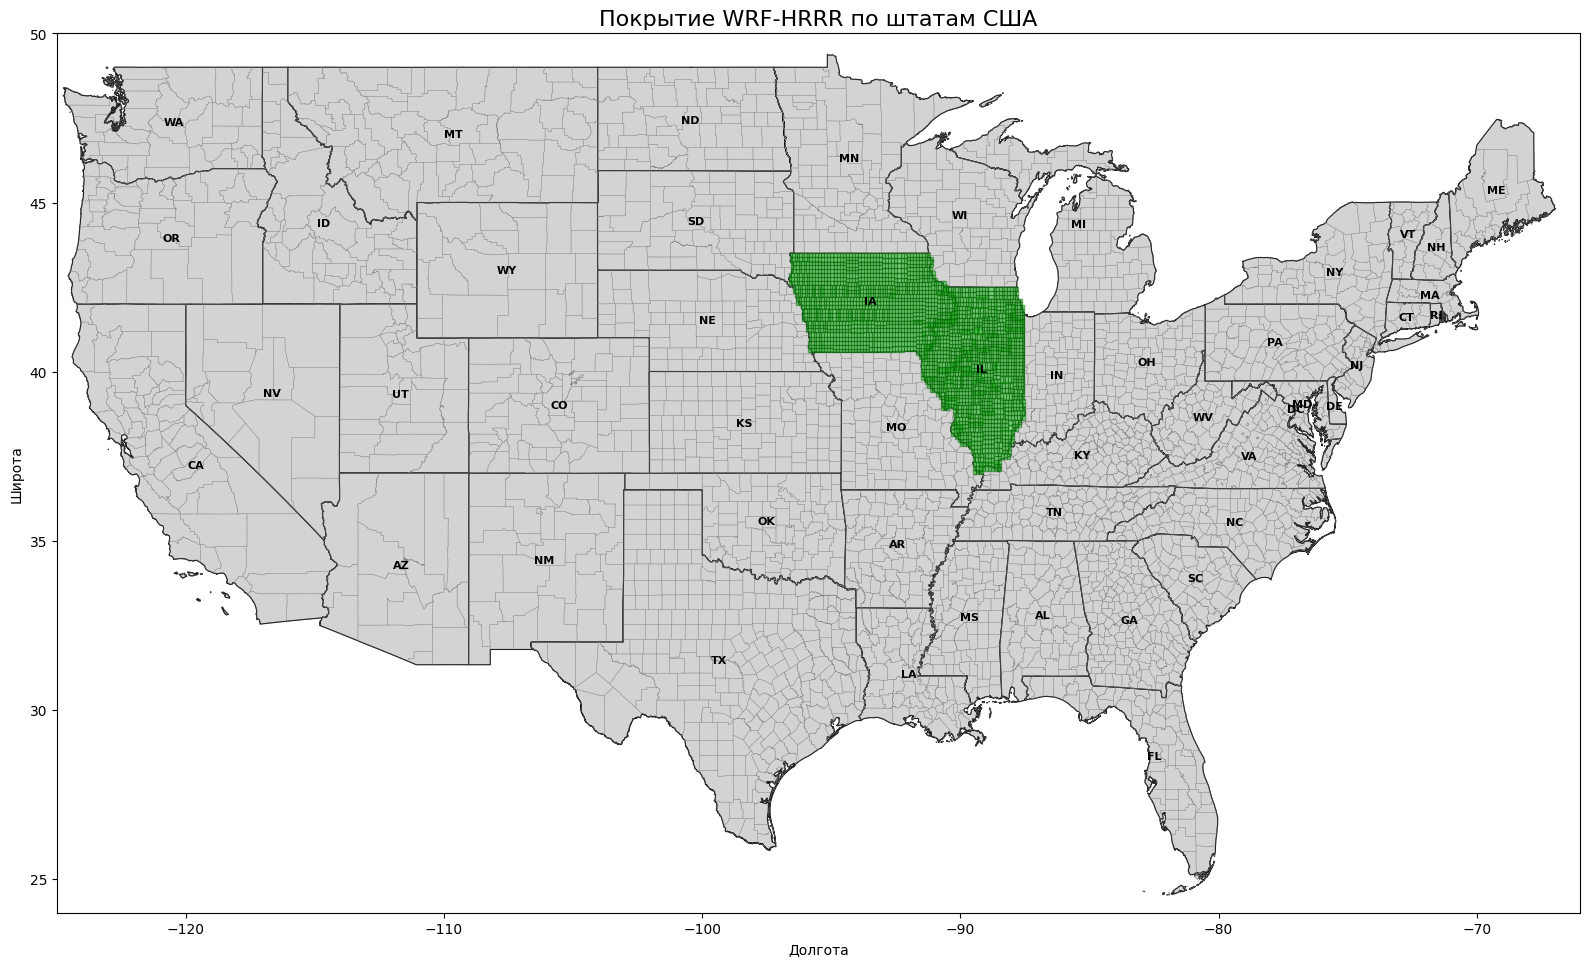

In [21]:
plot_map_polygons(polygons, "Покрытие WRF-HRRR по штатам США")